In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
np.random.seed(42)


In [2]:
tnse_base = []
for i in range(0,26):
  epoch = pd.read_csv(f'base/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_base.append(epoch)

tnse_independant_1= []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_1/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_1.append(epoch)

tnse_independant_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_2.append(epoch)

tnse_student_10 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_10.append(epoch)

tnse_student_50 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_50/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_50.append(epoch)

tnse_student_90 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_90/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_90.append(epoch)

tnse_student_10_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_10_2.append(epoch)

tnse_student_50_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_50_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_50_2.append(epoch)

tnse_student_90_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_90_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_90_2.append(epoch)


tnse_student_10_3 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_3/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_10_3.append(epoch)

tnse_student_50_3 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_50_3/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_50_3.append(epoch)

tnse_student_90_3 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_90_3/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_90_3.append(epoch)



In [3]:
tnse_predictions = [tnse_base,tnse_independant_1,tnse_independant_2,tnse_student_10,tnse_student_50,tnse_student_90,tnse_student_10_2,tnse_student_50_2,tnse_student_90_2,tnse_student_10_3,tnse_student_50_3,tnse_student_90_3]
tnse_predictions = np.array(tnse_predictions)
tnse_predictions = tnse_predictions.reshape(-1,100000)
print(tnse_predictions.shape)

(312, 100000)


In [4]:
tsne = TSNE(n_components=2,n_jobs=-1,perplexity=60,random_state=42)
epochs = 26
models = 12
prediction_embed = tsne.fit_transform(tnse_predictions)
print('[INFO] Shape of embedded tensor: ', tnse_predictions.shape)
prediction_embed = prediction_embed.reshape(models,epochs,2)
prediction_embed.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


[INFO] Shape of embedded tensor:  (312, 100000)


(12, 26, 2)

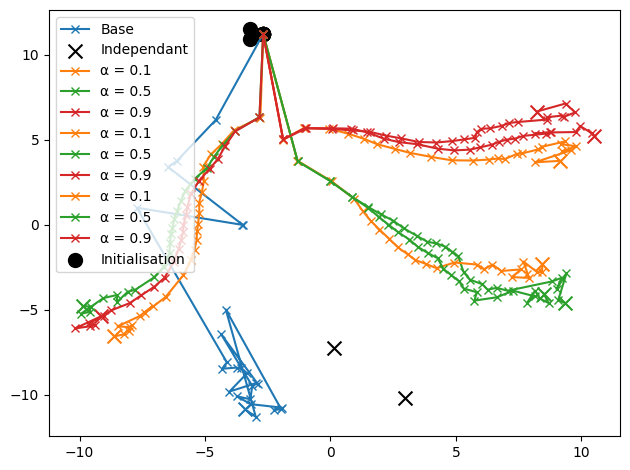

In [7]:
labels = ["Base", "Independant 1","Independant 2","⍺ = 0.1","⍺ = 0.5","⍺ = 0.9","⍺ = 0.1","⍺ = 0.5","⍺ = 0.9","⍺ = 0.1","⍺ = 0.5","⍺ = 0.9"]
colors = ["tab:blue","k", "k", "tab:orange", "tab:green", "tab:red", "tab:orange", "tab:green", "tab:red", "tab:orange", "tab:green", "tab:red" ]
for m in range(models):
    if m in [0,3,4,5,6,7,8,9,10,11]:
      plt.plot(prediction_embed[m,:,0],prediction_embed[m,:,1],marker='x',label=labels[m], color=colors[m])
    if m == 1:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m], label="Independant")
    else:
       plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m])
    plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k')
plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k', label="Initialisation") 

plt.legend()
plt.tight_layout()
plt.savefig("MNIST_lenet_distiliation_landscape.pdf", format="pdf")
plt.show()

# Quantisation 

In [6]:
tnse_base = []
for i in range(0,26):
  epoch = pd.read_csv(f'base/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_base.append(epoch)

tnse_independant_1= []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_1/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_1.append(epoch)

tnse_independant_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_2.append(epoch)

tnse_quantised_8 = []
for i in range(0,26):
  epoch = pd.read_csv(f'quantised_8_bit/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_quantised_8.append(epoch)

tnse_quantised_16 = []
for i in range(0,26):
  epoch = pd.read_csv(f'quantised_16_bit/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_quantised_16.append(epoch)

tnse_predictions = [tnse_base,tnse_independant_1,tnse_independant_2,tnse_quantised_8,tnse_quantised_16]
tnse_predictions = np.array(tnse_predictions)
tnse_predictions = tnse_predictions.reshape(-1,100000)
print(tnse_predictions.shape)




(130, 100000)


[INFO] Shape of embedded tensor:  (130, 100000)


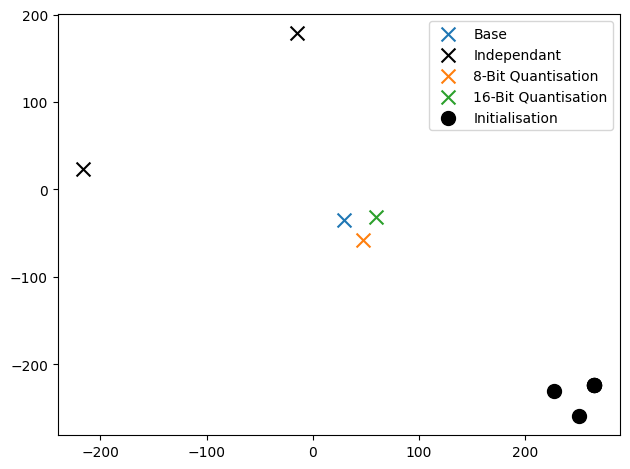

In [7]:
tsne = TSNE(n_components=2,n_jobs=-1,perplexity=30, random_state=42)
epochs = 26
models = 5
prediction_embed = tsne.fit_transform(tnse_predictions)
print('[INFO] Shape of embedded tensor: ', tnse_predictions.shape)
prediction_embed = prediction_embed.reshape(models,epochs,2)
prediction_embed

labels = ["Base", "Independant 1","Independant 2","8-Bit Quantisation","16-Bit Quantisation"]
colors = ["tab:blue","k", "k", "tab:orange", "tab:green"]
for m in range(models):
    if m == 1:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m], label="Independant")
    elif m==2:
       plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m])
    else:
       plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m],label=labels[m])
    plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k')
plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k', label="Initialisation") 
plt.legend()
plt.tight_layout()
plt.savefig("MNIST_resnet_quantisation_landscape.pdf", format="pdf")
plt.show()

# One Shot Pruning

In [8]:
tnse_base = []
for i in range(0,26):
  epoch = pd.read_csv(f'base/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_base.append(epoch)

tnse_independant_1= []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_1/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_1.append(epoch)

tnse_independant_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_2.append(epoch)

tnse_pruned_10 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_10/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_10.append(epoch)

tnse_pruned_30 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_30/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_30.append(epoch)

tnse_pruned_50 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_50/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_50.append(epoch)

tnse_pruned_70 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_70/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_70.append(epoch)

tnse_pruned_90 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_90/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_90.append(epoch)

tnse_student_10 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_10.append(epoch)

tnse_predictions = [tnse_base,tnse_independant_1,tnse_independant_2,tnse_pruned_10,tnse_pruned_30,tnse_pruned_50,tnse_pruned_70,tnse_pruned_90]
tnse_predictions = np.array(tnse_predictions)
tnse_predictions = tnse_predictions.reshape(-1,100000)
print(tnse_predictions.shape)

(208, 100000)


In [9]:
tsne = TSNE(n_components=2,n_jobs=-1,perplexity=15,random_state=42)
epochs = 26
models = 8
prediction_embed = tsne.fit_transform(tnse_predictions)
print('[INFO] Shape of embedded tensor: ', tnse_predictions.shape)
prediction_embed = prediction_embed.reshape(models,epochs,2)
prediction_embed.shape


[INFO] Shape of embedded tensor:  (208, 100000)


(8, 26, 2)

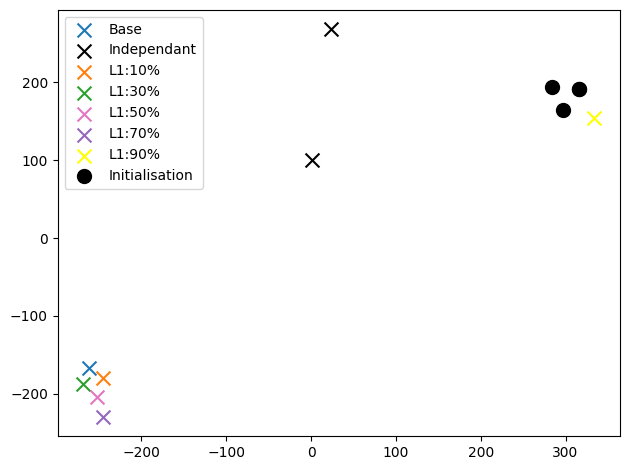

In [10]:
labels = ["Base", "Independant 1","Independant 2","L1:10%","L1:30%","L1:50%","L1:70%","L1:90%"]
colors = ["tab:blue","k", "k", "tab:orange", "tab:green","tab:pink","tab:purple","yellow"]
for m in range(models):
    if m == 1:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m], label="Independant")
    elif m==2:
       plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m])
    else:
       plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m],label=labels[m])
    if m in [0,1,2]:
      plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k')
plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k', label="Initialisation") 
plt.legend()
plt.tight_layout()
plt.savefig("MNIST_resnet_prune_landscape.pdf", format="pdf")
plt.show()

# All Together

In [11]:
tnse_base = []
for i in range(0,26):
  epoch = pd.read_csv(f'base/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_base.append(epoch)

tnse_independant_1= []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_1/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_1.append(epoch)

tnse_independant_2 = []
for i in range(0,26):
  epoch = pd.read_csv(f'independant_2/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_independant_2.append(epoch)

tnse_student_10 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_10.append(epoch)

tnse_student_50 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_50/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_50.append(epoch)

tnse_student_90 = []
for i in range(0,26):
  epoch = pd.read_csv(f'student_same_90/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_student_90.append(epoch)

tnse_quantised_8 = []
for i in range(0,26):
  epoch = pd.read_csv(f'quantised_8_bit/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_quantised_8.append(epoch)

tnse_quantised_16 = []
for i in range(0,26):
  epoch = pd.read_csv(f'quantised_16_bit/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_quantised_16.append(epoch)

tnse_pruned_10 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_10/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_10.append(epoch)

tnse_pruned_30 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_30/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_30.append(epoch)

tnse_pruned_50 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_50/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_50.append(epoch)

tnse_pruned_70 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_70/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_70.append(epoch)

tnse_pruned_90 = []
for i in range(0,26):
  epoch = pd.read_csv(f'pruned_90/{i}_softmax.csv')
  epoch = pd.DataFrame(epoch)
  epoch = epoch.to_numpy().reshape(-1,100000)
  tnse_pruned_90.append(epoch)

tnse_predictions = [tnse_base,tnse_independant_1,tnse_independant_2,tnse_student_10,tnse_student_50,tnse_student_90,tnse_quantised_8,tnse_quantised_16,tnse_pruned_10,tnse_pruned_30,tnse_pruned_50,tnse_pruned_70,tnse_pruned_90]
tnse_predictions = np.array(tnse_predictions)
tnse_predictions = tnse_predictions.reshape(-1,100000)
print(tnse_predictions.shape)


(338, 100000)


In [12]:
tsne = TSNE(n_components=2,n_jobs=-1,perplexity=15,random_state=42)
epochs = 26
models = 13
prediction_embed = tsne.fit_transform(tnse_predictions)
print('[INFO] Shape of embedded tensor: ', tnse_predictions.shape)
prediction_embed = prediction_embed.reshape(models,epochs,2)
prediction_embed.shape


[INFO] Shape of embedded tensor:  (338, 100000)


(13, 26, 2)

In [13]:
prune_colours = ["peachpuff","sandybrown","chocolate","sienna","saddlebrown"]
distill_colours = ["yellowgreen","olivedrab","darkolivegreen"]
quantisation_colours = ["gold","khaki"]

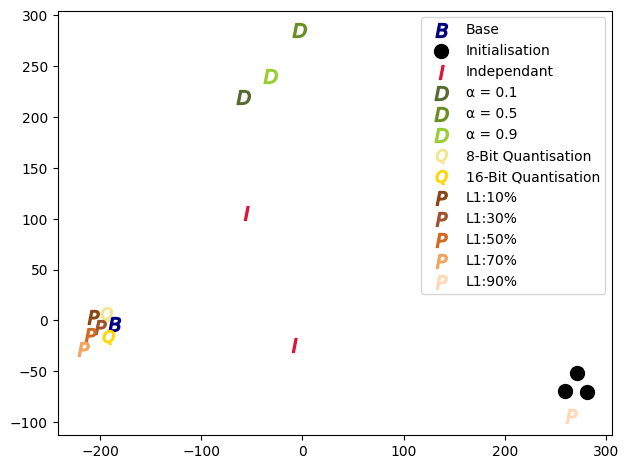

In [14]:
labels = ["Base", "Independant","Independant","⍺ = 0.1","⍺ = 0.5","⍺ = 0.9","8-Bit Quantisation","16-Bit Quantisation","L1:10%","L1:30%","L1:50%","L1:70%","L1:90%"]
# colors = ["tab:blue","k", "k", "tab:orange", "tab:green","tab:pink","tab:purple","yellow"]
for m in range(models):
   #  if m == 1:
   #    plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m], label="Independant")
   #  elif m==2:
   #     plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='x',c=colors[m])
   if m in [0]:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='$B$',label=labels[m],color ="navy")
      plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k',label="Initialisation")
   elif m in [1,2]:
      if m == 1:
         plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='$I$',label=labels[m], color="crimson")
      else:
         plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='$I$',color="crimson")
      plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k')
   elif m in[3,4,5]:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker="$D$",label=labels[m],color=distill_colours[len(distill_colours)-1])
      distill_colours.pop()
   elif m in[6,7]:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='$Q$',label=labels[m],color=quantisation_colours[(len(quantisation_colours)-1)])
      quantisation_colours.pop()
   elif m in [8,9,10,11,12]:
      plt.scatter(prediction_embed[m,epochs-1,0],prediction_embed[m,epochs-1,1],s=100, marker='$P$',label=labels[m],color =prune_colours[(len(prune_colours)-1)])
      prune_colours.pop()
   # plt.scatter(prediction_embed[m,0,0],prediction_embed[m,0,1],s=100, marker='o',c='k', label="Initialisation") 
plt.legend()
plt.tight_layout()
plt.savefig("MNIST_resnet_compression_landscape.pdf", format="pdf")
plt.show()

# Keras in Pytorch

! git clone https://github.com/TsingZ0/loss-landscape.git
def build_lenet_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1 ,32, 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32,64,3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(64 *3*3, 128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flat(x)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

# Create an instance of the PyTorch model
pytorch_model = LeNet()

In [ ]:
def copy_weights(keras_layer, pytorch_layer):
    if hasattr(keras_layer, 'get_weights') and hasattr(pytorch_layer, 'weight'):
        weights = keras_layer.get_weights()
        if weights:
            weight = torch.Tensor(weights[0])
            pytorch_layer.weight.data = weight
    if hasattr(keras_layer, 'get_weights') and hasattr(pytorch_layer, 'weight'):
        weights = keras_layer.get_weights()
        if len(weights)>1:
            bias = torch.Tensor(weights[1])
            pytorch_layer.bias.data = bias

def copy_keras_to_pytorch(keras_model, pytorch_model):
    for keras_layer, pytorch_layer in zip(keras_model.layers, pytorch_model.children()):
        copy_weights(keras_layer, pytorch_layer)

keras_model = tf.keras.models.load_model('/content/leNetMNIST_final.tf')
copy_keras_to_pytorch(keras_model, pytorch_model)

keras_model
for layer in keras_model.layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        if weights:
            print(f"Layer {layer.name}: {weights}")